# Comparing models

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
dist1 = np.load('fixed1.npz')
dist2 = np.load('fixed2.npz')
scores1 = np.asarray([dist1['scores']]).flatten()
scores2 = np.asarray([dist2['scores']]).flatten()
scores1.sort()
scores2.sort()
results = np.vstack([scores1, scores2])
print(results.shape)
logresults = np.log10(results + 1)

(2, 1000)


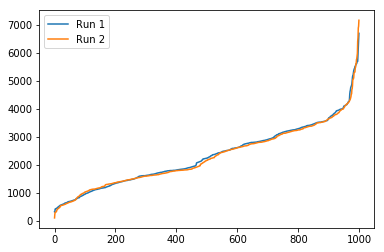

In [4]:
for i in range(2):
    plt.plot(results[i])
plt.legend(['Run 1','Run 2'])

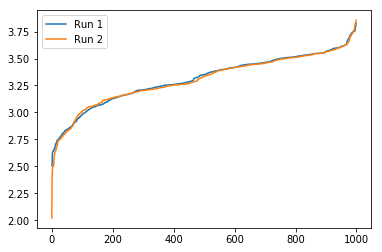

In [5]:
for i in range(2):
    plt.plot(logresults[i])
plt.legend(['Run 1','Run 2'])

In [7]:
# KS stats for sampling error for n=1000.
# Sampling from the same distribution gives
# a k-stat of 0.032 and p of 0.68
# 1000 samples should have enough stat power
# to resolve small differences in performance
stats.ks_2samp(logresults[0], logresults[1])

Ks_2sampResult(statistic=0.03199999999999997, pvalue=0.6785103823828913)

# Initial training
Evaluate trained models by comparing their performance.  
First training for 100 epochs on 10 fixed order mcts games.

### From early midgame

In [2]:
results = []
for i in [0, 49, 99]:
    dist = np.load('0_10_epox100_lr0.1_e{}.npz'.format(i))
    scores = np.asarray([dist['scores']]).flatten()
    scores.sort()
    results.append(scores)
results = np.vstack(results)￼
results = []
for i in [0, 49, 99]:
    dist = np.load('0_10_epox100_lr0.1_e{}.npz'.format(i))
    scores = np.asarray([dist['scores']]).flatten()
    scores.sort()
    results.append(scores)
results = np.vstack(results)
print(results.shape)
logresults = np.log10(results + 1)
(3, 1000)
In [3]:
￼
for i in range(len(results)):
    plt.plot(results[i])
plt.legend([0, 49, 99])
Out[3]:
<matplotlib.legend.Legend at 0x1e72dd532e8>
￼
In [4]:
￼
for i in range(len(logresults)):
    plt.plot(logresults[i])
plt.legend([0, 49, 99])
Out[4]:
<matplotlib.legend.Legend at 0x1e72ddcfe80>
￼
In [5]:

print(results.shape)
logresults = np.log10(results + 1)

(3, 1000)


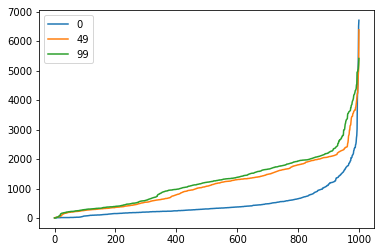

In [3]:
for i in range(len(results)):
    plt.plot(results[i])
plt.legend([0, 49, 99])

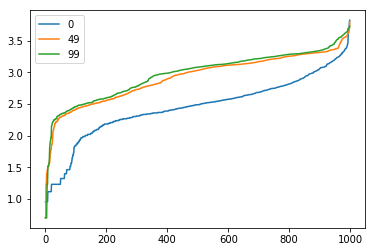

In [4]:
for i in range(len(logresults)):
    plt.plot(logresults[i])
plt.legend([0, 49, 99])

In [5]:
print(stats.ks_2samp(logresults[0], logresults[2]))
print(stats.ks_2samp(logresults[1], logresults[2]))

Ks_2sampResult(statistic=0.504, pvalue=5.587863354159026e-112)
Ks_2sampResult(statistic=0.07, pvalue=0.014097547738750731)


### From start

In [7]:
results = []
for i in [0, 49, 99]:
    dist = np.load('0_10_epox100_lr0.1_e{}_start.npz'.format(i))
    scores = np.asarray([dist['scores']]).flatten()
    scores.sort()
    results.append(scores)
results = np.vstack(results)
print(results.shape)
logresults = np.log10(results + 1)

(3, 1000)


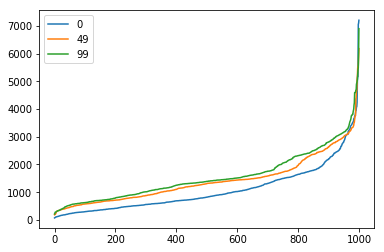

In [8]:
for i in range(len(results)):
    plt.plot(results[i])
plt.legend([0, 49, 99])

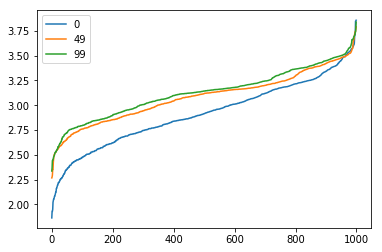

In [9]:
for i in range(len(logresults)):
    plt.plot(logresults[i])
plt.legend([0, 49, 99])

In [10]:
print(stats.ks_2samp(logresults[0], logresults[2]))
print(stats.ks_2samp(logresults[1], logresults[2]))

Ks_2sampResult(statistic=0.304, pvalue=5.194893269078377e-41)
Ks_2sampResult(statistic=0.07400000000000001, pvalue=0.007873852459750459)


### Compared with fixed
Trained model performs better than random, but not better than fixed order

In [11]:
dist1 = np.load('fixed1.npz')
dist2 = np.load('0_10_epox100_lr0.1_e{}_start.npz'.format(99))
scores1 = np.asarray([dist1['scores']]).flatten()
scores2 = np.asarray([dist2['scores']]).flatten()
scores1.sort()
scores2.sort()
results = np.vstack([scores1, scores2])
print(results.shape)
logresults = np.log10(results + 1)

(2, 1000)


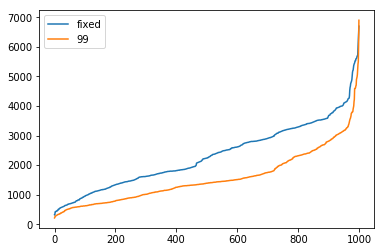

In [15]:
for i in range(len(results)):
    plt.plot(results[i])
plt.legend(['fixed', '99'])

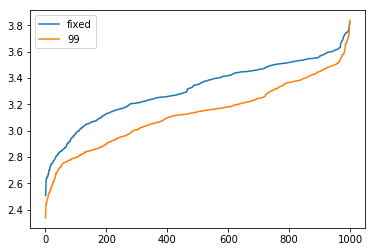

In [16]:
for i in range(len(logresults)):
    plt.plot(logresults[i])
plt.legend(['fixed','99'])

In [12]:
print(stats.ks_2samp(logresults[0], logresults[1]))

Ks_2sampResult(statistic=0.358, pvalue=1.0386480044592873e-56)


## New training comparisons
* 0-9: Fixed
* 10-19: `0_10_epox100_lr0.1_e99`

In [8]:
results = []
names = ['0_10_epox100_lr0.1_e99.npz',
        '10_20_epox100_lr0.1_e99.npz',
         '0_20_epox100_lr0.1_e99.npz']
for name in names:
    dist = np.load(name)
    scores = np.asarray([dist['scores']]).flatten()
    scores.sort()
    results.append(scores)
results = np.vstack(results)
print(results.shape)
logresults = np.log10(results + 1)

(3, 1000)


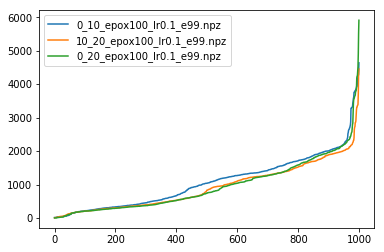

In [9]:
for i in range(len(results)):
    plt.plot(results[i])
plt.legend(names)

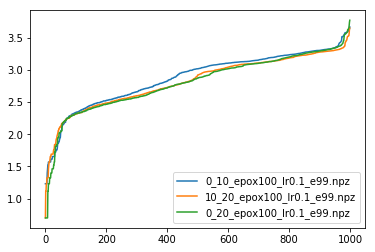

In [10]:
for i in range(len(logresults)):
    plt.plot(logresults[i])
plt.legend(names)

In [11]:
print(stats.ks_2samp(logresults[0], logresults[2]))
print(stats.ks_2samp(logresults[1], logresults[2]))

Ks_2sampResult(statistic=0.11399999999999999, pvalue=3.923743560962539e-06)
Ks_2sampResult(statistic=0.038000000000000034, pvalue=0.4585797916571728)


0_10 trained is strongest, statistically significant compared to 10_20 or 0_20 trained.

### Pretraining

In [16]:
results = []
names = ['0_10_epox100_lr0.1_e99.npz',
        '10_20_epox100_lr0.1_e99.npz',
        '10_20_epox100_lr0.1pre_e99.npz',
        '10_20_epox100_lr0.01pre_e99.npz']
for name in names:
    dist = np.load(name)
    scores = np.asarray([dist['scores']]).flatten()
    scores.sort()
    results.append(scores)
results = np.vstack(results)
print(results.shape)
logresults = np.log10(results + 1)

(4, 1000)


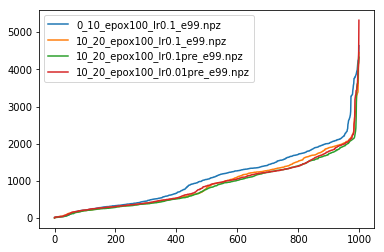

In [17]:
for i in range(len(results)):
    plt.plot(results[i])
plt.legend(names)

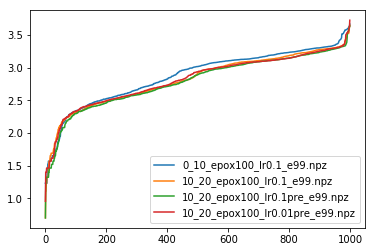

In [18]:
for i in range(len(logresults)):
    plt.plot(logresults[i])
plt.legend(names)

In [19]:
print(stats.ks_2samp(logresults[0], logresults[2]))

Ks_2sampResult(statistic=0.133, pvalue=3.40973448751773e-08)


0_10 trained is still strongest, statistically significant compared to pretrained on 0_10 then trained on 10_20.
The lower loss of the lr=0.01 pretrained model does not translate to better playing strength.

### vs Fixed
None of these are better than Fixed, so I should use Fixed to simulate games until the network outperforms.

In [20]:
results = []
names = ['0_10_epox100_lr0.1_e99.npz',
        'fixed1.npz',
        'fixed2.npz']
for name in names:
    dist = np.load(name)
    scores = np.asarray([dist['scores']]).flatten()
    scores.sort()
    results.append(scores)
results = np.vstack(results)
print(results.shape)
logresults = np.log10(results + 1)

(3, 1000)


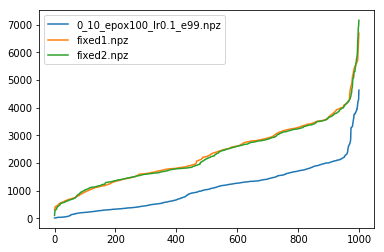

In [21]:
for i in range(len(results)):
    plt.plot(results[i])
plt.legend(names)

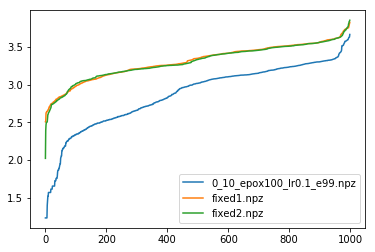

In [22]:
for i in range(len(logresults)):
    plt.plot(logresults[i])
plt.legend(names)

In [23]:
print(stats.ks_2samp(logresults[0], logresults[2]))

Ks_2sampResult(statistic=0.475, pvalue=1.6422924177984775e-99)


### 2019-06-10 Less epochs
Performance peaks around 10-20 epochs, which corresponds to when the model starts to overfit and val loss goes up.
Still not better than fixed.

In [14]:
results = []
names = ['20190610/5_20_epox30_lr0.1_e{}.npz'.format(i) \
         for i in [0, 9, 19, 29]]
names.extend(['fixed1.npz', 'fixed2.npz'])
for name in names:
    dist = np.load(name)
    scores = np.asarray([dist['scores']]).flatten()
    scores.sort()
    results.append(scores)
results = np.vstack(results)
print(results.shape)
logresults = np.log10(results + 1)

(6, 1000)


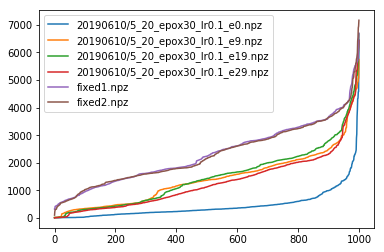

In [15]:
for i in range(len(results)):
    plt.plot(results[i])
plt.legend(names)

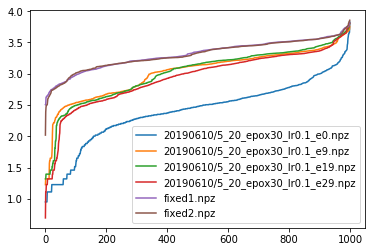

In [5]:
for i in range(len(logresults)):
    plt.plot(logresults[i])
plt.legend(names)

In [10]:
print(np.mean(results, axis=1))
print(np.mean(logresults, axis=1))
print('Here score and logscore have different winners (10 vs 20 epochs)')

[ 445.112 1418.224 1482.46  1294.16  2323.836 2295.112]
[2.40595139 3.01659746 3.00801683 2.93668946 3.30919566 3.30314662]
Here score and logscore have different winners (10 vs 20 epochs)


In [17]:
print(stats.ks_2samp(logresults[1], logresults[2]))
print(stats.ks_2samp(logresults[1], logresults[3]))

Ks_2sampResult(statistic=0.05900000000000005, pvalue=0.059197199379241984)
Ks_2sampResult(statistic=0.11700000000000005, pvalue=1.9469841454622735e-06)


### 2019-06-10 More Data
Performance improves given more training data.

In [2]:
results = []
names = ['20190610/5_30_epox60_lr0.1_e{}.npz'.format(i) \
         for i in [9, 19, 29, 39]]
names.extend(['fixed1.npz', 'fixed2.npz'])
for name in names:
    dist = np.load(name)
    scores = np.asarray([dist['scores']]).flatten()
    scores.sort()
    results.append(scores)
results = np.vstack(results)
print(results.shape)
logresults = np.log10(results + 1)

(6, 1000)


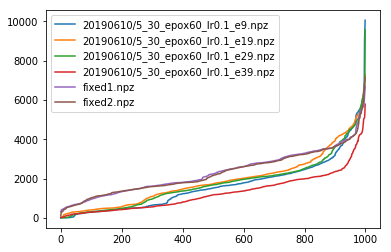

In [3]:
for i in range(len(results)):
    plt.plot(results[i])
plt.legend(names)

Trained network may play better than fixed at high scores (complex and filled boards) since the curves cross over the fixed curve for the last 900 games.

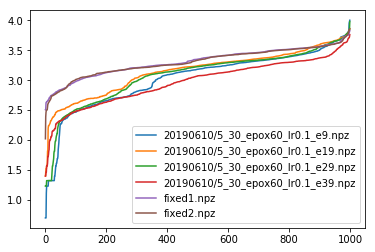

In [4]:
for i in range(len(logresults)):
    plt.plot(logresults[i])
plt.legend(names)

In [5]:
print(np.mean(results, axis=1))
print(np.mean(logresults, axis=1))
print('I can train for longer and get better results with more data')

[1660.772 1905.176 1774.176 1277.352 2323.836 2295.112]
[3.02442535 3.14896565 3.0806699  2.96831611 3.30919566 3.30314662]
I can train for longer and get better results with more data


In [9]:
# Compare 5-30 with 5-20
results = []
names = ['20190610/5_20_epox30_lr0.1_e9.npz', 
         '20190610/5_30_epox60_lr0.1_e19.npz', 
         'fixed1.npz']
for name in names:
    dist = np.load(name)
    scores = np.asarray([dist['scores']]).flatten()
    scores.sort()
    results.append(scores)
results = np.vstack(results)
print(results.shape)
logresults = np.log10(results + 1)

(3, 1000)


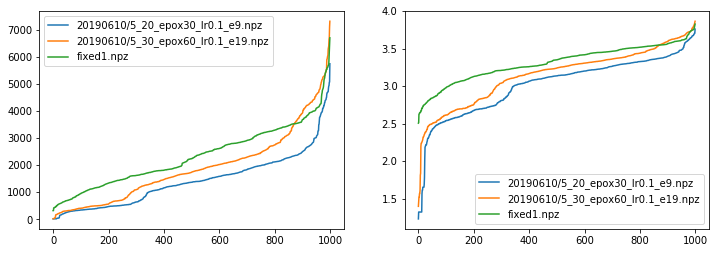

Playing strength improved with more training games


In [18]:
plt.subplots(figsize=(12, 4))
plt.subplot(121)
for i in range(len(results)):
    plt.plot(results[i])
plt.legend(names)
plt.subplot(122)
for i in range(len(logresults)):
    plt.plot(logresults[i])
plt.legend(names)
plt.show()
print('Playing strength improved with more training games')